# **1. Perkenalan Dataset**


### Patient Diabetes Classification

Dataset yang digunakan di dalam projek ini adalah dataset yang berkaitan dengan diabetes dan mengandung berbagai macam berbagai pengukuran biomedikal dan karakteristik pasien tersebut. Dataset ini dapat diunduh di platform Kaggle: https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset/data

Feature pada dataset ini adalah sebagai berikut:

- **ID**: ID unik untuk setiap entri dalam dataset.
- **No_Pation**: Nomor identifikasi pasien. Bisa berupa nomor rekam medis atau ID pasien lainnya.
- **Gender**: Jenis kelamin pasien (`F` untuk Perempuan, `M` untuk Laki-laki).
- **AGE**: Usia pasien dalam tahun.
- **Urea**: Kadar urea dalam darah (kemungkinan dalam satuan mg/dL atau mmol/L). Urea adalah produk limbah dari metabolisme protein dan dapat mengindikasikan fungsi ginjal.
- **Cr**: Kadar kreatinin dalam darah (kemungkinan dalam mg/dL atau µmol/L). Kreatinin juga merupakan produk limbah dan indikator fungsi ginjal.
- **HbA1c**: Hemoglobin terglikasi, mengukur rata-rata kadar gula darah selama 2–3 bulan terakhir (dinyatakan dalam persentase).
- **Chol**: Kadar kolesterol total dalam darah (kemungkinan dalam mg/dL atau mmol/L).
- **TG**: Kadar trigliserida dalam darah (kemungkinan dalam mg/dL atau mmol/L). Trigliserida adalah jenis lemak dalam darah.
- **HDL**: Kadar kolesterol high-density lipoprotein (HDL), dikenal sebagai kolesterol "baik" (dalam mg/dL atau mmol/L).
- **LDL**: Kadar kolesterol low-density lipoprotein (LDL), dikenal sebagai kolesterol "jahat" (dalam mg/dL atau mmol/L).
- **VLDL**: Kadar kolesterol very low-density lipoprotein (VLDL) dalam darah (dalam mg/dL atau mmol/L).
- **BMI**: Indeks Massa Tubuh, pengukuran lemak tubuh berdasarkan tinggi dan berat badan (dihitung sebagai berat badan dalam kilogram dibagi tinggi badan dalam meter kuadrat).
- **CLASS**: Label kelas yang menunjukkan status diabetes pasien, terdiri dari:
  - `N`: Non-diabetes
  - `P`: Pradiabetes
  - `Y`: Diabetes

# **2. Import Library**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

In [30]:
# load the raw data
df_raw = pd.read_csv("../diabetes_raw.csv")

In [31]:
# check number of rows and columns
print(f"Number of rows: {df_raw.shape[0]}")
print(f"Number of columns: {df_raw.shape[1]}")

Number of rows: 1000
Number of columns: 14


In [32]:
# show the first 5 rows
print(df_raw.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


# **4. Exploratory Data Analysis (EDA)**

In [33]:
# show dataframe info
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
None


- Data terdiri dari 1000 data pasien dengan 13 feature.
- Kolom dengan tipe object (kategori) adalah Gender dan CLASS.
- Kolom dengan tipe numerik (integer dan float) adalah ID, No_Pation, AGE, Urea, Cr, HbA1c, Chol,TG, HDL, LDL, VLDL, dan BMI.
- Feature ID dan No_Pation hanyalah nomor identifikasi yang bisa kita **abaikan**.
- CLASS merupakan feature target.
- Tidak terdapat missing value pada dataset ini.

In [34]:
# check duplicates
print(f"Number of duplicates: {df_raw.duplicated().sum()}")

Number of duplicates: 0


- Tidak ada data duplikat pada dataset ini

In [35]:
# see dataframe statistics
print(df_raw.describe(include="all"))

                 ID     No_Pation Gender          AGE         Urea  \
count   1000.000000  1.000000e+03   1000  1000.000000  1000.000000   
unique          NaN           NaN      3          NaN          NaN   
top             NaN           NaN      M          NaN          NaN   
freq            NaN           NaN    565          NaN          NaN   
mean     340.500000  2.705514e+05    NaN    53.528000     5.124743   
std      240.397673  3.380758e+06    NaN     8.799241     2.935165   
min        1.000000  1.230000e+02    NaN    20.000000     0.500000   
25%      125.750000  2.406375e+04    NaN    51.000000     3.700000   
50%      300.500000  3.439550e+04    NaN    55.000000     4.600000   
75%      550.250000  4.538425e+04    NaN    59.000000     5.700000   
max      800.000000  7.543566e+07    NaN    79.000000    38.900000   

                 Cr        HbA1c         Chol           TG          HDL  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
unique   

- **Gender**: Jenis kelamin terdiri dari 3 kategori dimana seharusnya hanya 2 (F dan M) sehingga kemungkinan terdapat **data yang salah** pada feature ini.

- **AGE**: Rata-rata umur pasien adalah sekitar 53–54 tahun, dengan pasien termuda berusia 20 tahun dan tertua 79 tahun. Hal ini menunjukkan bahwa data mencakup pasien dari usia muda hingga lanjut usia.

- **Urea**: Kadar urea dalam darah pasien rata-rata adalah 5,12 mg/dL, dengan rentang dari 0,5 hingga 38,9 mg/dL. Jika dilihat dari distribusinya 75% pasien memiliki kadar urea ≤ 5,7 mg/dL sehingga pasien dengan kadar urea mendekati 38,9 mg/dL kemungkinan merupakan **outlier** yang menunjukkan gangguan ginjal serius.

- **Cr**: Rata-rata kadar kreatinin dalam darah pasien adalah 68,94 µmol/L (sekitar 0,78 mg/dL) dengan rentang 6 – 800 µmol/L (sekitar 0,06 – 9,05 mg/dL). 75% pasien memiliki kadar kreatinin ≤ 73 µmol/L (~0,83 mg/dL) sehingga pasien dengan kadar gula 800 µmol/L (9,05 mg/dL) merupakan **outlier** signifikan, yang bisa mengindikasikan gagal ginjal berat.

- **HbA1c**: Rata-rata kadar HbA1c adalah 8,28%. Ini menunjukkan bahwa secara umum banyak pasien yang berada dalam rentang pradiabetes hingga diabetes (≥5,7%). Bahkan, 75% pasien memiliki HbA1c di atas 6,5%, menunjukkan dominasi pasien dengan masalah kadar gula darah tinggi.

- **Chol**: Kadar kolesterol total (Chol) rata-rata adalah 4,86 mmol/L, dengan nilai maksimum 10,3 mmol/L. Sebagian besar pasien memiliki kadar kolesterol total yang tergolong normal hingga tinggi.

- **TG**: Trigliserida (TG) memiliki rata-rata 2,35 mmol/L, dan maksimum hingga 13,8 mmol/L, mengindikasikan kemungkinan dislipidemia pada sebagian pasien.

- **HDL**: HDL (kolesterol baik) memiliki rata-rata 1,20 mmol/L.

- **LDL**: LDL (kolesterol jahat) memiliki rata-rata 2,61 mmol/L.

- **VLDL**: VLDL memiliki rata-rata 1,85 mmol/L, tetapi ada nilai ekstrem hingga 35 mmol/L yang diduga merupakan outlier.

- **BMI**: BMI pasien rata-rata adalah 29,58 yang termasuk dalam kategori overweight menurut WHO. Bahkan, 75% pasien memiliki BMI ≥ 33, menunjukkan bahwa mayoritas pasien cenderung ke arah obesitas.

- **CLASS**: terdapat 5 status diabetes pasien dimana seharusnya hanya 3 status (N, P, dan Y) sehingga terdapat **data yang salah** pada feature ini.

- Distribusi data dalam setiap feature beragam sehingga perlu dilakukan **standarisasi**

In [36]:
# see unique values in gender column
print(df_raw["Gender"].unique())


['F' 'M' 'f']


- Tedapat kesalah data pada kolom jenis kelamin dimana f yang harusnya huruf besar

In [37]:
# change data in gender column to uppercase
df_raw["Gender"] = df_raw["Gender"].str.upper()

In [38]:
# check gender column again
df_raw["Gender"].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

- Setelah perbaikan didapatkan pasien didominasi oleh laki-laki dengan jumlah 565 pasien (56,5%)

In [39]:
# see unique values in CLASS column
df_raw["CLASS"].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [40]:
# get the unique values in CLASS column
print(df_raw["CLASS"].unique())

['N' 'N ' 'P' 'Y' 'Y ']


- Terdapat spasi pada salah satu kategori sehingga dihitung menjadi kategori yang berbeda

In [41]:
# trim the CLASS column
df_raw["CLASS"] = df_raw["CLASS"].str.strip()

In [42]:
# check the CLASS column again
print(df_raw["CLASS"].value_counts())

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


- Setelah diperbaiki didapatkan data pasien didominasi oleh pasien yang memiliki diabetes dengan jumlah sebanyak 844 pasien (84,4%), diikuti dengan pasien yang tidak memiliki diabetes sebanyak 103 pasien (10,3%), dan paling sedikit pradiabetes sebanyak 53 pasien (5.3%).

- Dataset ini menunjukkan **imbalance data** yang akan berpengaruh ke proses pemodelan akan cenderung memprediksi ke kategori yang lebih dominan, sehingga perlu dilakukannya penambahan data (oversampling) agar data memiliki distribusi yang sama setiap kategorinya.

In [43]:
# get numeric columns
numeric_cols = df_raw.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop(["ID", "No_Pation"])

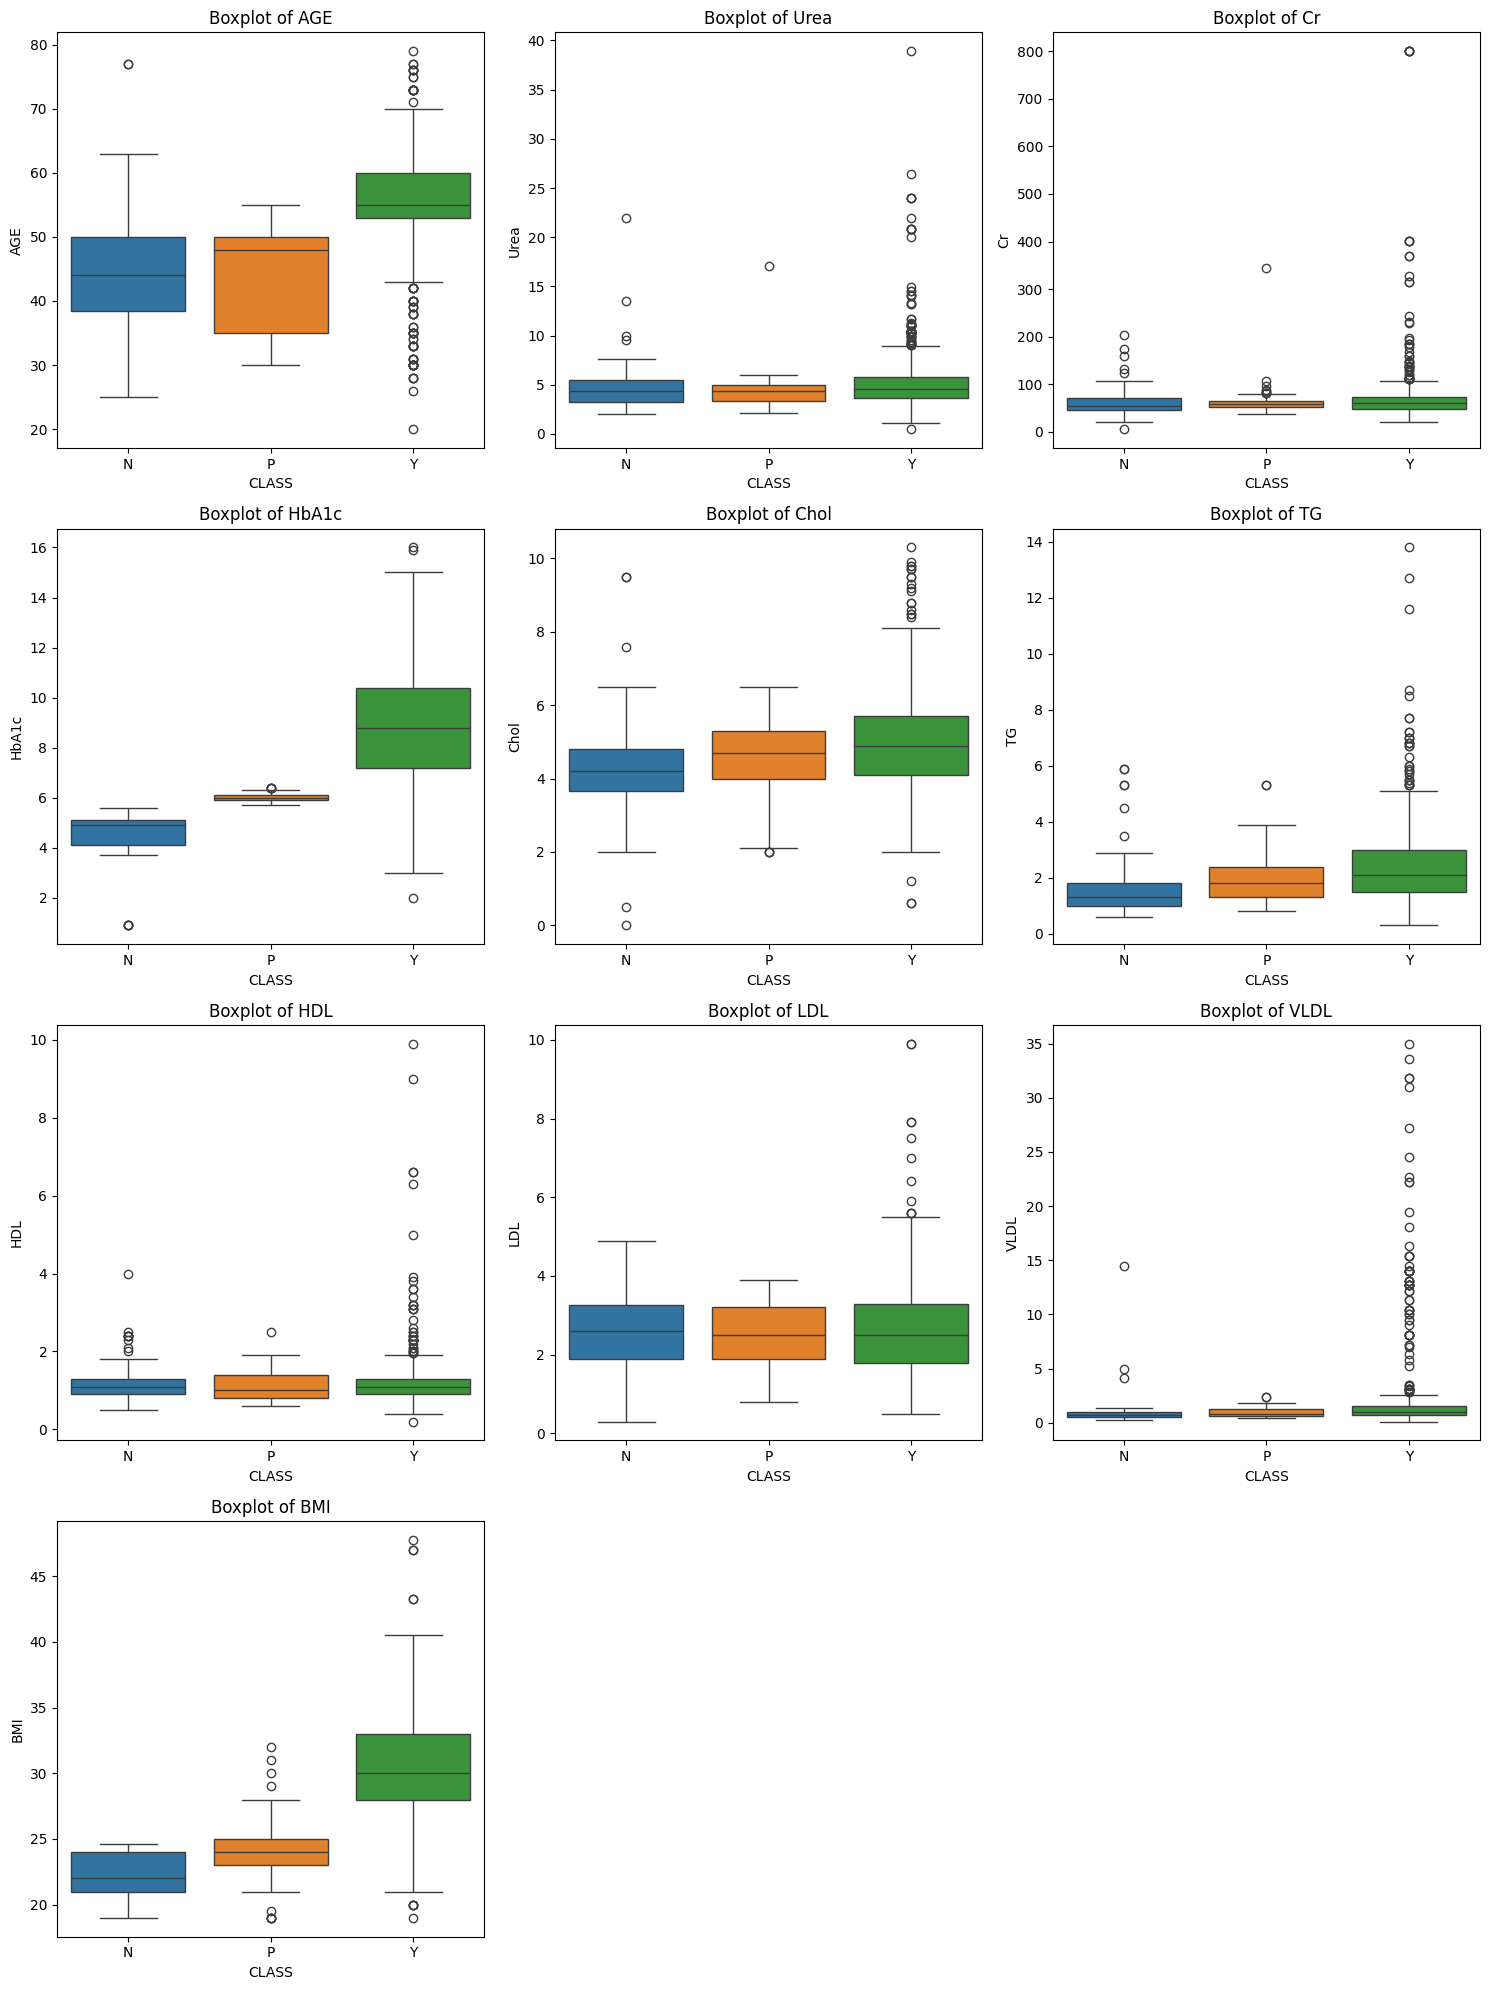

In [44]:
# create box plots in a grid layout
num_cols = len(numeric_cols)
rows = (num_cols + 2) // 3  # calculate rows for 3 columns per row

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x="CLASS", y=col, data=df_raw, ax=axes[i], hue="CLASS")
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("CLASS")
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

- **AGE**: Secara umum, pasien diabetes (`Y`) memiliki rentang usia yang lebih tua dibandingkan kelompok non-diabetes (`N`) dan pradiabetes (`P`), yaitu mulai dari usia 40 hingga 70 tahun. Banyak outlier atas menunjukkan pasien diabetes lanjut usia, namun outlier bawah juga cukup banyak, menandakan adanya pasien diabetes yang masih muda.

- **Urea**: Pasien diabetes cenderung memiliki kadar urea yang lebih tinggi dibandingkan kelompok lainnya. Rentang nilai juga lebih lebar, dan jumlah outlier jauh lebih banyak. Hal ini mengindikasikan kemungkinan adanya gangguan ginjal pada sebagian besar pasien diabetes.

- **Cr**: Sama halnya dengan urea, kadar kreatinin pada pasien diabetes juga lebih tinggi dan memiliki banyak outlier ekstrem. Ini memperkuat indikasi bahwa komplikasi ginjal sering terjadi pada pasien diabetes.

- **HbA1c**: HbA1c pada pasien diabetes meningkat drastis dibandingkan pradiabetes dan non-diabetes. Ini menjadi indikator kuat klasifikasi diabetes.

- **Chol**: Pasien diabetes memiliki kadar kolesterol yang cenderung lebih tinggi. Rentang data pun lebih lebar dengan banyak outlier.

- **TG**: Pasien diabetes menunjukkan kadar trigliserida yang secara umum lebih tinggi dibandingkan kelompok lainnya. Jumlah outlier yang sangat banyak menunjukkan variasi tinggi dalam kadar TG.

- **HDL**: Kadar HDL cenderung rendah pada mayoritas pasien diabetes. Sebaliknya, non-diabetes memiliki median HDL yang lebih tinggi.

- **LDL**: Tidak terlihat perbedaan mencolok antar kelompok. Namun, ada lebih banyak variasi (dan outlier) pada kelompok diabetes.

- **VLDL**: Pasien diabetes memiliki sebaran kadar VLDL yang lebih tinggi dan bervariasi. Banyaknya outlier menunjukkan adanya pasien dengan kadar VLDL yang sangat tinggi.

- **BMI**: Median BMI pada pasien diabetes jauh lebih tinggi dibandingkan kelompok lainnya, menunjukkan kecenderungan obesitas. Kelompok diabetes juga memiliki jumlah outlier BMI tinggi yang jauh lebih banyak, menguatkan hubungan antara obesitas dan diabetes.

- **Outlier** pada data ini menggambarkan kejadian sebenarnya, sehingga akan tetap dipertahankan.

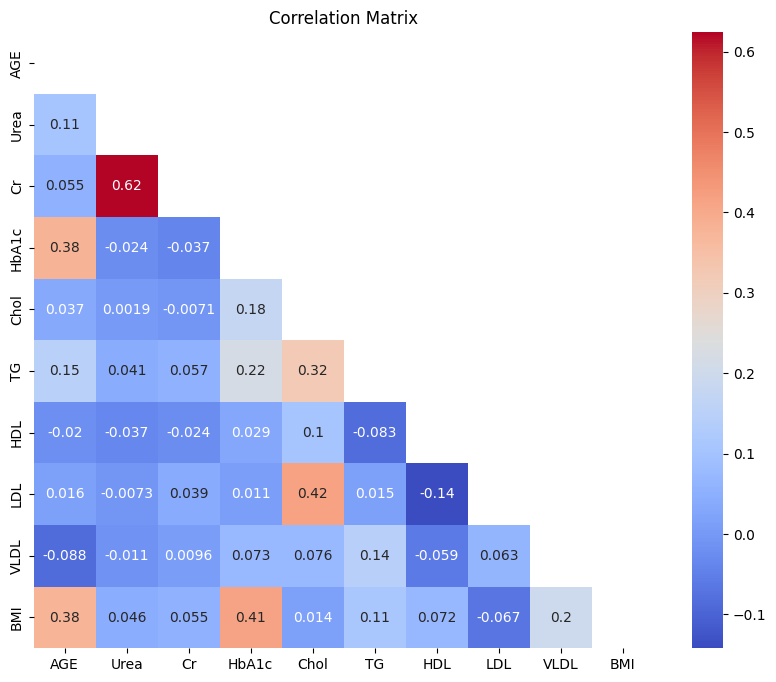

In [45]:
# create correlation matrix for numeric columns

corr = df_raw[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

- Menggunakan correlation matrix didapatkan nilai korelasi antar feature numerik dan didapatkan kadar urea dan kreatin dalam darah memiliki korelasi positif yang cukup kuat sebesar 0,62 yang berarti kenaikan kadar urea diikuti dengan kenaikan kreatin dalam dalam.

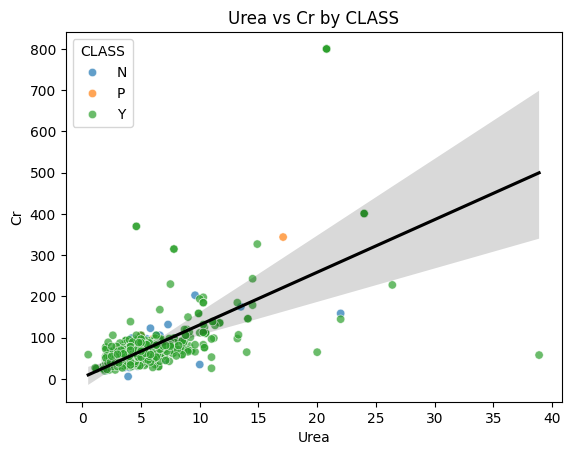

In [46]:
# create scatter plot Urea vs Cr colorized by CLASS with regression line
sns.scatterplot(data=df_raw, x="Urea", y="Cr", hue="CLASS", alpha=0.7)
sns.regplot(data=df_raw, x="Urea", y="Cr", scatter=False, color="black", line_kws={"label": "Regression Line"})
plt.title("Urea vs Cr by CLASS")
plt.xlabel("Urea")
plt.ylabel("Cr")
plt.legend(title="CLASS")
plt.show()

- Meskipun terdapat kolerasi tetapi sebaran data terlihat tidak begitu terpisah antar status diabetes pasien sehingga salah satu kolom dapat di drop. Untuk projek ini, kedua kolom tetap di pertahan agar informasinya tidak berkurang

# **5. Data Preprocessing**

Dari hasil EDA, didapatkan kesimpulan pada tahapan preprocessing data yang perlu dilakukan adalah:
- Melakukan encoding untuk feature kategori
- Melakukan pembagian data train dan test
- Melakukan oversampling pada data train
- Melakukan standarisasi data train dan test untuk menyamakan rentang nilai setiap feature numerik


In [47]:
# encode Gender with pd.get_dummies and ensure values are 0 and 1
df_raw = pd.get_dummies(df_raw, columns=["Gender"], dtype=int)

In [ ]:
# encode CLASS column with label encoding
le = LabelEncoder()
df_raw["CLASS"] = le.fit_transform(df_raw["CLASS"])

In [49]:
# get label encoded values and their corresponding classes and save to a dictionary
label_encoded_dict = {i: class_name for i, class_name in enumerate(le.classes_)}
print("Label Encoded Values:")
for i, class_name in label_encoded_dict.items():
    print(f"{i}: {class_name}")

# save label encoded values to a CSV file
label_encoded_df = pd.DataFrame(list(label_encoded_dict.items()), columns=["label", "class"])
label_encoded_df.to_csv("label_encoded_values.csv", index=False)
print("Label encoded values saved to label_encoded_values.csv")

Label Encoded Values:
0: N
1: P
2: Y
Label encoded values saved to label_encoded_values.csv


In [50]:
# split the data into features and target
X = df_raw.drop(columns=["ID", "No_Pation", "CLASS"])
y = df_raw["CLASS"]

In [ ]:
# split into train and test sets proportionally class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [52]:
# see class distribution in train and test sets
print("Class distribution in train set:")
print(y_train.value_counts(normalize=True))

print("Class distribution in test set:")
print(y_test.value_counts(normalize=True))  

Class distribution in train set:
CLASS
2    0.84375
0    0.10250
1    0.05375
Name: proportion, dtype: float64
Class distribution in test set:
CLASS
2    0.845
0    0.105
1    0.050
Name: proportion, dtype: float64


In [ ]:
# apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [54]:
# see class distribution in train after SMOTE
print("Class distribution in train set after SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

Class distribution in train set after SMOTE:
CLASS
2    0.333333
0    0.333333
1    0.333333
Name: proportion, dtype: float64


In [ ]:
# standardize the numeric columns data train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [56]:
# create train and test dataframes
df_train = pd.DataFrame(X_train_scaled, columns=X.columns)
df_train["CLASS"] = y_train_resampled.values

df_test = pd.DataFrame(X_test_scaled, columns=X.columns)
df_test["CLASS"] = y_test.values

In [57]:
# check the first few rows df_train
print("First few rows of the final train set:")
print(df_train.head())

        AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
0  0.949325 -1.036915 -0.924113  1.655936  1.009102 -0.014982 -0.209345   
1 -1.824369  0.061695  0.375421 -0.433490  0.751424 -0.185510 -0.018271   
2  1.696089  0.105639  0.039335  0.588995 -0.880535 -0.782359 -0.400419   
3  2.122811  1.380026  0.801130  0.277804 -1.653568 -0.867623 -0.782566   
4  1.376047  1.248193  0.442638  0.500083 -0.021609  2.201887 -1.164714   

        LDL      VLDL       BMI  Gender_F  Gender_M  CLASS  
0 -0.811540 -0.169310  0.274145  1.320569 -0.850532      2  
1  1.036280 -0.210707 -0.161666 -0.757249  1.175735      2  
2 -0.485454 -0.334901  1.581578 -0.757249  1.175735      2  
3 -1.246321 -0.334901  0.847236 -0.757249  1.175735      2  
4  0.166717  0.037679  1.581578 -0.757249  1.175735      2  


In [58]:
# check the first few rows df_test
print("First few rows of the final test set:")
print(df_test.head())

First few rows of the final test set:
        AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
0  0.309242 -0.158027 -0.095100 -0.166755 -0.536964  0.837660 -0.400419   
1  1.376047  1.248193  0.151363 -2.478461 -1.052320  2.798737 -0.209345   
2 -1.824369  1.072415  0.397827  0.099980 -0.451072 -0.782359 -0.018271   
3  0.415922  0.105639 -0.162317  0.544539 -1.395890 -1.464473  0.172803   
4 -0.544202  0.149584  0.218581 -0.878049  1.352673 -0.867623 -0.209345   

        LDL      VLDL       BMI  Gender_F  Gender_M  CLASS  
0 -0.811540 -0.003718 -0.379571 -0.757249  1.175735      1  
1  1.144975 -0.210707 -0.379571  1.320569 -0.850532      0  
2 -0.159368  2.811332  0.361307 -0.757249  1.175735      2  
3 -1.137626 -0.500492  0.927861 -0.757249  1.175735      2  
4  2.231928 -0.376299 -0.379571  1.320569 -0.850532      0  


In [59]:
# save the train and test data to a new CSV file
df_train.to_csv("diabetes_preprocessing/diabetes_train.csv", index=False)
df_test.to_csv("diabetes_preprocessing/diabetes_test.csv", index=False)
print("Train and test data saved to diabetes_preprocessing/diabetes_train.csv and diabetes_preprocessing/diabetes_test.csv")

Train and test data saved to diabetes_preprocessing/diabetes_train.csv and diabetes_preprocessing/diabetes_test.csv
